In [18]:
# Relative Libraries and Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error


In [2]:
df = pd.read_csv("FINAL_FROM_DF.csv")
df

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846399,ZOTA,SM,221.00,221.00,214.00,217.00,217.00,220.00,14000,3041550.00,2017-12-29,14,INE358U01012
846400,ZUARI,EQ,562.00,562.00,549.55,550.80,552.00,556.80,105184,58163061.60,2017-12-29,2218,INE840M01016
846401,ZUARIGLOB,EQ,255.50,258.40,252.50,253.25,253.00,254.10,90067,22968100.60,2017-12-29,2001,INE217A01012
846402,ZYDUSWELL,EQ,1038.00,1068.00,1033.00,1043.20,1035.00,1023.10,28601,29938840.10,2017-12-29,1401,INE768C01010


In [3]:
df = df.sort_values('TIMESTAMP')
df

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
648190,INDORAMA,EQ,34.45,34.50,33.05,34.05,34.00,34.25,77762,2.633534e+06,2016-01-01,622,INE156A01020
648030,GOLDINFRA,EQ,19.90,20.80,19.60,20.10,20.15,19.25,117068,2.365314e+06,2016-01-01,639,INE260D01016
648031,GOLDSHARE,EQ,2271.30,2278.50,2268.30,2276.55,2278.50,2271.30,1576,3.585925e+06,2016-01-01,132,INF789F01059
648032,GOLDTECH,EQ,4.95,4.95,4.95,4.95,4.95,4.75,6100,3.019500e+04,2016-01-01,8,INE805A01014
648033,GOODLUCK,EQ,103.50,104.60,102.65,103.65,103.00,103.10,39465,4.087354e+06,2016-01-01,354,INE127I01024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845164,HERCULES,EQ,148.20,150.40,147.00,148.00,148.00,149.25,17944,2.662514e+06,2017-12-29,401,INE688E01024
845163,HEIDELBERG,EQ,154.10,155.75,152.40,153.10,153.80,153.60,86501,1.331895e+07,2017-12-29,1193,INE578A01017
845162,HEG,EQ,2254.40,2336.35,2254.40,2336.35,2336.35,2225.10,305803,7.079692e+08,2017-12-29,11207,INE545A01016
845160,HDIL,EQ,60.00,66.70,60.00,65.55,65.50,59.10,74278309,4.785410e+09,2017-12-29,171634,INE191I01012


In [4]:
# Add a classifier to check if the value of stock has increased or not
df['TARGET'] = (df['CLOSE'] > df['PREVCLOSE']).astype(int)
features = df[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'LAST', 'PREVCLOSE', 'TOTTRDQTY', 'TOTTRDVAL']]
target = df['TARGET']

In [5]:
# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [55]:
# Choosing a model -> RandomForest in this case
model = RandomForestClassifier()

In [56]:
# Training the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# Make predictions
predictions = model.predict(X_test)

In [9]:
# Report Accuracy and stuff
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9483403335282755
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     90807
           1       0.95      0.94      0.94     78474

    accuracy                           0.95    169281
   macro avg       0.95      0.95      0.95    169281
weighted avg       0.95      0.95      0.95    169281



In [10]:
# Saving the trained model
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [11]:
# Extracting the data we tested to print the portfolio
indices = X_test.index.tolist()
symbols = [df.loc[index, 'SYMBOL'] for index in indices]
time_stamps = [df.loc[index, 'TIMESTAMP'] for index in indices]
symbols = pd.Series(symbols)
results_df = pd.DataFrame({'SYMBOL': symbols, 'Prediction': predictions, 'TIME_STAMP' : time_stamps})

In [12]:
print(results_df)

            SYMBOL  Prediction  TIME_STAMP
0       DHAMPURSUG           0  2016-01-27
1        SEAMECLTD           1  2017-06-06
2        JKLAKSHMI           1  2016-06-17
3            IIHFL           0  2016-03-22
4           CIMMCO           0  2016-10-17
...            ...         ...         ...
169276   HCL-INSYS           1  2016-09-09
169277         GSS           0  2016-12-07
169278  IBULHSGFIN           1  2016-12-16
169279    VESUVIUS           1  2016-04-07
169280     POLARIS           0  2017-09-06

[169281 rows x 3 columns]


In [6]:
model = joblib.load('random_forest_model.pkl')

In [19]:
mse = mean_squared_error(y_test, predictions)

# R-squared (R2) Score
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

In [20]:
print("MSE: ", mse)
print("R2: ", r2)
print("RMSE:", rmse)
print("MAE:", mae)

MSE:  0.05165966647172453
R2:  0.7922586682169561
RMSE: 0.22728762938559707
MAE: 0.05165966647172453


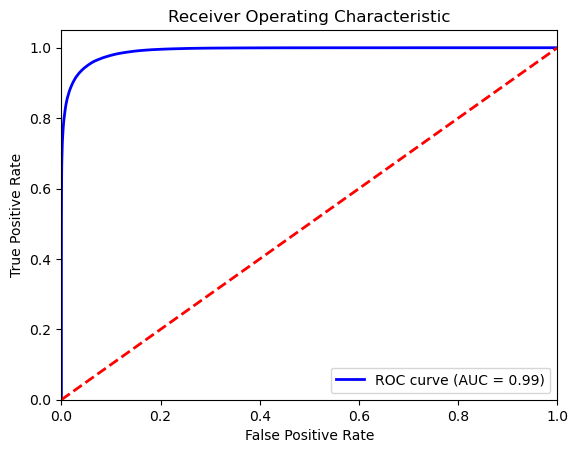

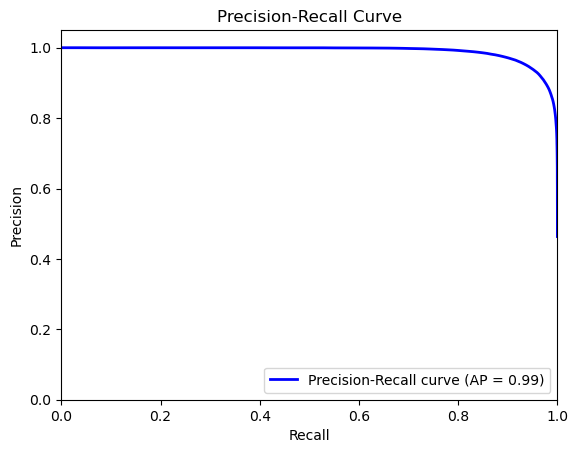

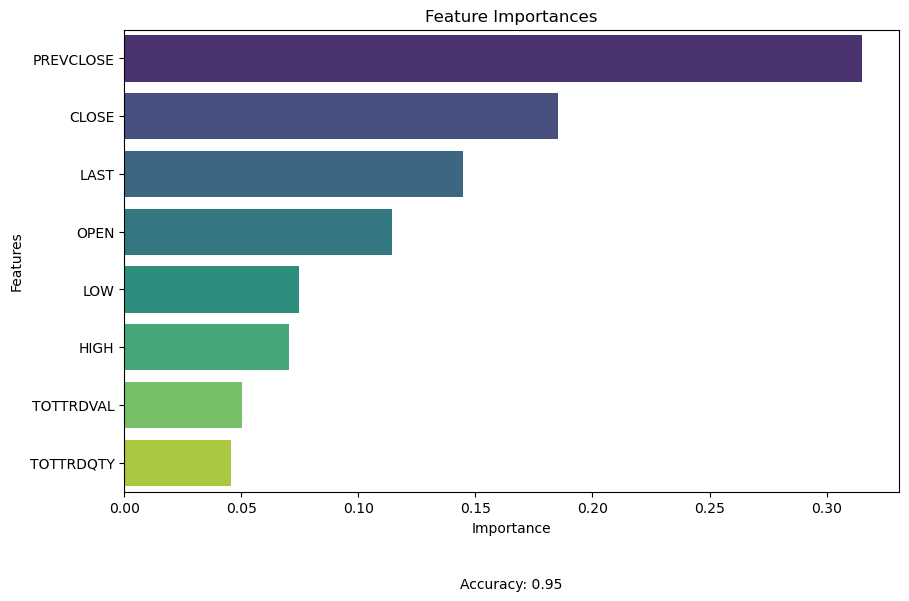

In [18]:

# Obtain predicted probabilities for positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
numeric_features = ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'LAST', 'PREVCLOSE', 'TOTTRDQTY', 'TOTTRDVAL']
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [numeric_features[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=sorted_features, palette='viridis')

# Calculate and display the accuracy
accuracy = model.score(X_test, y_test)
accuracy_text = f'Accuracy: {accuracy:.2f}'
plt.text(0.5, -0.2, accuracy_text, ha='center', va='center', transform=plt.gca().transAxes)

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
